Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from joblib import dump, load

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Loading Data

In [402]:
# Creating dataframe to store the data
df=pd.read_csv(r'/content/drive/MyDrive/csi project/archive/train.csv')
df.head()

<ipython-input-402-862c43eee84e>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'/content/drive/MyDrive/csi project/archive/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [403]:
len(df)

100000

In [404]:
#Remove Unnesessary Columns
df=df.drop(['Name','SSN','ID','Type_of_Loan'] ,axis= 1)

Data Preprocessing

In [405]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [406]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Customer_ID              100000 non-null  object
 1   Month                    100000 non-null  object
 2   Age                      100000 non-null  object
 3   Occupation               100000 non-null  object
 4   Annual_Income            100000 non-null  object
 5   Num_of_Loan              100000 non-null  object
 6   Num_of_Delayed_Payment   92998 non-null   object
 7   Changed_Credit_Limit     100000 non-null  object
 8   Credit_Mix               100000 non-null  object
 9   Outstanding_Debt         100000 non-null  object
 10  Credit_History_Age       90970 non-null   object
 11  Payment_of_Min_Amount    100000 non-null  object
 12  Amount_invested_monthly  95521 non-null   object
 13  Payment_Behaviour        100000 non-null  object
 14  Monthly_Balance      

Here we are cleaning the text from the un-neaded symbols like uhnderscore _ , as models understands numbers!

In [407]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [408]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Here we are converting the type of datasets to the applicable types.

In [409]:
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [410]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             92938 non-null   object
 1   Credit_Mix             79805 non-null   object
 2   Credit_History_Age     90970 non-null   object
 3   Payment_of_Min_Amount  100000 non-null  object
 4   Payment_Behaviour      92400 non-null   object
 5   Credit_Score           100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [411]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x

In [412]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [413]:
# To display all columns in the console
pd.set_option('display.max_columns', None)

# Print the first 10 rows with all columns
print(df.head(30))

    Customer_ID  Month  Age    Occupation  Annual_Income  \
0          3392      1   23     Scientist       19114.12   
1          3392      2   23     Scientist       19114.12   
2          3392      3 -500     Scientist       19114.12   
3          3392      4   23     Scientist       19114.12   
4          3392      5   23     Scientist       19114.12   
5          3392      6   23     Scientist       19114.12   
6          3392      7   23     Scientist       19114.12   
7          3392      8   23     Scientist       19114.12   
8          8625      1   28           NaN       34847.84   
9          8625      2   28       Teacher       34847.84   
10         8625      3   28       Teacher       34847.84   
11         8625      4   28       Teacher       34847.84   
12         8625      5   28       Teacher       34847.84   
13         8625      6   28       Teacher       34847.84   
14         8625      7   28       Teacher       34847.84   
15         8625      8   28       Teache

In [414]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [415]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             92938 non-null   object
 1   Credit_Mix             79805 non-null   object
 2   Payment_of_Min_Amount  100000 non-null  object
 3   Payment_Behaviour      92400 non-null   object
 4   Credit_Score           100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [416]:

# Define the columns you want to fill null values in
columns_to_fill = ['Occupation', 'Monthly_Inhand_Salary','Num_Credit_Inquiries','Credit_Mix','Payment_Behaviour']

# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with mode within each group
def fill_null_with_mode(group):
    return group[columns_to_fill].fillna(group[columns_to_fill].mode().iloc[0])

# Apply the custom function to the grouped DataFrame and reset the index
df[columns_to_fill] = grouped.apply(fill_null_with_mode).reset_index(drop=True)[columns_to_fill]



<ipython-input-416-31185a2ed25e>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns_to_fill] = grouped.apply(fill_null_with_mode).reset_index(drop=True)[columns_to_fill]


In [417]:
df.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [418]:
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 else x)

In [419]:
columns_to_fill = ['Monthly_Balance', 'Amount_invested_monthly', 'Credit_History_Age', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment','Age']

# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with median within each group
def fill_null_with_median(group):
    return group[columns_to_fill].fillna(group[columns_to_fill].median())

# Apply the custom function to the grouped DataFrame and reset the index
df[columns_to_fill] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns_to_fill]

<ipython-input-419-002c5a0f95ba>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns_to_fill] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns_to_fill]


In [420]:
df.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [421]:
len(df)

100000

In [422]:
# To display all columns in the console
pd.set_option('display.max_columns', None)

# Print the first 10 rows with all columns
print(df.head(30))

    Customer_ID  Month   Age    Occupation  Annual_Income  \
0          3392      1  23.0     Scientist       19114.12   
1          3392      2  23.0     Scientist       19114.12   
2          3392      3  23.0     Scientist       19114.12   
3          3392      4  23.0     Scientist       19114.12   
4          3392      5  23.0     Scientist       19114.12   
5          3392      6  23.0     Scientist       19114.12   
6          3392      7  23.0     Scientist       19114.12   
7          3392      8  23.0     Scientist       19114.12   
8          8625      1  28.0       Teacher       34847.84   
9          8625      2  28.0       Teacher       34847.84   
10         8625      3  28.0       Teacher       34847.84   
11         8625      4  28.0       Teacher       34847.84   
12         8625      5  28.0       Teacher       34847.84   
13         8625      6  28.0       Teacher       34847.84   
14         8625      7  28.0       Teacher       34847.84   
15         8625      8  

In [423]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             100000 non-null  object
 1   Credit_Mix             100000 non-null  object
 2   Payment_of_Min_Amount  100000 non-null  object
 3   Payment_Behaviour      100000 non-null  object
 4   Credit_Score           100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [424]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(unique_values)
    print(len(unique_values))
    print('----------------------')

Column: Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932]
12500
----------------------
Column: Month
[1 2 3 4 5 6 7 8]
8
----------------------
Column: Age
[  23.   28.   34. ... 4808. 2263. 1342.]
1729
----------------------
Column: Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
15
----------------------
Column: Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
13487
----------------------
Column: Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
13235
----------------------
Column: Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644 

In [425]:
columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
           'Num_Credit_Inquiries']

for column in columns:
    value_counts = df[column].value_counts()  # Count the occurrences of each unique value
    values_to_replace = value_counts[value_counts < 10].index  # Get the values with less than 10 occurrences
    df[column] = np.where(df[column].isin(values_to_replace), np.NaN, df[column])  # Replace the values with np.NaN


In [426]:
# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with median within each group
def fill_null_with_median(group):
    return group[columns].fillna(group[columns].median())

df[columns] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns]

<ipython-input-426-4c65c7759cd6>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns]


In [427]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(unique_values)
    print(len(unique_values))
    print('----------------------')

Column: Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932]
12500
----------------------
Column: Month
[1 2 3 4 5 6 7 8]
8
----------------------
Column: Age
[23.  28.  34.  54.  55.  21.  31.  33.  30.  24.  44.  45.  40.  41.
 32.  35.  36.  39.  37.  20.  46.  26.  42.  19.  48.  38.  43.  22.
 16.  18.  15.  27.  25.  14.  17.  47.  53.  56.  29.  49.  51.  50.
 52.  25.5 48.5 23.5 34.5 40.5 26.5 15.5 50.5 28.5 16.5 20.5 33.5 30.5]
56
----------------------
Column: Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
15
----------------------
Column: Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
13487
----------------------
Column: Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
13235
----------------------
Column: Num_Bank_Accounts
[ 3.  2.  1

In [428]:
# df = df.abs()
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,6.5,11.27,4.0,Good,809.98,31.944960,268.5,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,6.5,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


Feature Engineering

In [429]:
# Create a feature for monthly savings
df['Monthly_Savings'] = df['Monthly_Inhand_Salary'] - df['Annual_Income'] / 12

# Create a feature for the total number of financial accounts
df['Total_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Create a feature for the average monthly income
df['Avg_Monthly_Income'] = df['Annual_Income'] / 12

# Create a feature for the average monthly spending
df['Avg_Monthly_Spending'] = df['Avg_Monthly_Income'] - df['Monthly_Inhand_Salary']

# Create a feature for the income-to-age ratio
df['Income_to_Age_Ratio'] = df['Annual_Income'] / df['Age']

# Create a feature for the monthly savings-to-income ratio
df['Savings_to_Income_Ratio'] = df['Monthly_Savings'] / df['Annual_Income']

In [430]:
df_categorical = df[['Customer_ID', 'Month', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                     'Num_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Num_of_Delayed_Payment', 'Payment_of_Min_Amount',
                     'Credit_Score', 'Payment_Behaviour']]

# Numerical columns
df_numerical = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Amount_invested_monthly',
                   'Monthly_Balance', 'Monthly_Savings', 'Total_Accounts', 'Avg_Monthly_Income', 'Avg_Monthly_Spending',
                   'Income_to_Age_Ratio', 'Savings_to_Income_Ratio']]



In [431]:
# Verify the resulting dataframes
print("Categorical dataframe:")
print(df_categorical)

print("\nNumerical dataframe:")
print(df_numerical)

Categorical dataframe:
       Customer_ID  Month Occupation  Num_Bank_Accounts  Num_Credit_Card  \
0             3392      1  Scientist                3.0              4.0   
1             3392      2  Scientist                3.0              4.0   
2             3392      3  Scientist                3.0              4.0   
3             3392      4  Scientist                3.0              4.0   
4             3392      5  Scientist                3.0              4.0   
...            ...    ...        ...                ...              ...   
99995        37932      4   Mechanic                4.0              6.0   
99996        37932      5   Mechanic                4.0              6.0   
99997        37932      6   Mechanic                4.0              6.0   
99998        37932      7   Mechanic                4.0              6.0   
99999        37932      8   Mechanic                4.0              6.0   

       Interest_Rate  Num_of_Loan Credit_Mix  Credit_History_Age

In [432]:
# Calculate the correlation matrix for numerical dataframe
correlation_matrix = df_numerical.corr().abs()

# Set the threshold for correlation
correlation_threshold = 0.8

# Create a set to store the columns to be dropped
columns_to_drop = set()

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= correlation_threshold:
            # Identify highly correlated columns
            column_name = correlation_matrix.columns[i]
            columns_to_drop.add(column_name)
# Drop the highly correlated columns from numerical dataframe
df_numerical_filtered = df_numerical.drop(columns=columns_to_drop)

In [433]:

# Verify the filtered numerical dataframe
print("\nFiltered numerical dataframe after removing highly correlated columns:")
print(df_numerical_filtered)


Filtered numerical dataframe after removing highly correlated columns:
        Age  Annual_Income  Monthly_Inhand_Salary  Outstanding_Debt  \
0      23.0       19114.12            1824.843333            809.98   
1      23.0       19114.12            1824.843333            809.98   
2      23.0       19114.12            1824.843333            809.98   
3      23.0       19114.12            1824.843333            809.98   
4      23.0       19114.12            1824.843333            809.98   
...     ...            ...                    ...               ...   
99995  25.0       39628.99            3359.415833            502.38   
99996  25.0       39628.99            3359.415833            502.38   
99997  25.0       39628.99            3359.415833            502.38   
99998  25.0       39628.99            3359.415833            502.38   
99999  25.0       39628.99            3359.415833            502.38   

       Credit_Utilization_Ratio  Changed_Credit_Limit  Num_Credit_Inquiries

In [434]:
df = pd.concat([df_categorical, df_numerical_filtered], axis=1)

In [435]:
df.shape

(100000, 25)

In [436]:
df=df.drop(['Customer_ID'],axis=1)

In [437]:
df.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,1,Scientist,3.0,4.0,3.0,4.0,Good,265.0,7.0,No,Good,High_spent_Small_value_payments,23.0,19114.12,1824.843333,809.98,26.822620,11.27,4.0,49.574949,80.415295,312.494089,7.0,0.012138
1,2,Scientist,3.0,4.0,3.0,4.0,Good,268.5,6.5,No,Good,Low_spent_Large_value_payments,23.0,19114.12,1824.843333,809.98,31.944960,11.27,4.0,49.574949,118.280222,284.629162,7.0,0.012138
2,3,Scientist,3.0,4.0,3.0,4.0,Good,267.0,7.0,No,Good,Low_spent_Medium_value_payments,23.0,19114.12,1824.843333,809.98,28.609352,11.27,4.0,49.574949,81.699521,331.209863,7.0,0.012138
3,4,Scientist,3.0,4.0,3.0,4.0,Good,268.0,4.0,No,Good,Low_spent_Small_value_payments,23.0,19114.12,1824.843333,809.98,31.377862,6.27,4.0,49.574949,199.458074,223.451310,7.0,0.012138
4,5,Scientist,3.0,4.0,3.0,4.0,Good,269.0,6.5,No,Good,High_spent_Medium_value_payments,23.0,19114.12,1824.843333,809.98,24.797347,11.27,4.0,49.574949,41.420153,341.489231,7.0,0.012138


In [438]:
df.to_csv('/content/drive/MyDrive/csi project/v2/decoded_data.csv',index=False)

Label Encoding

In [439]:
label_encode_cols = ['Month', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                     'Num_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Num_of_Delayed_Payment', 'Payment_of_Min_Amount',
                     'Credit_Score', 'Payment_Behaviour']

# Create a dictionary to store the encoder objects
encoders = {}

# Iterate over each column and apply label encoding
for column in label_encode_cols:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

# Save the encoder objects separately
dump(encoders, '/content/drive/MyDrive/csi project/v2/encoders.joblib')

['/content/drive/MyDrive/csi project/v2/encoders.joblib']

In [440]:
df.to_csv('/content/drive/MyDrive/csi project/v2/encoded_data.csv',index=False)

In [441]:
df = df.abs()

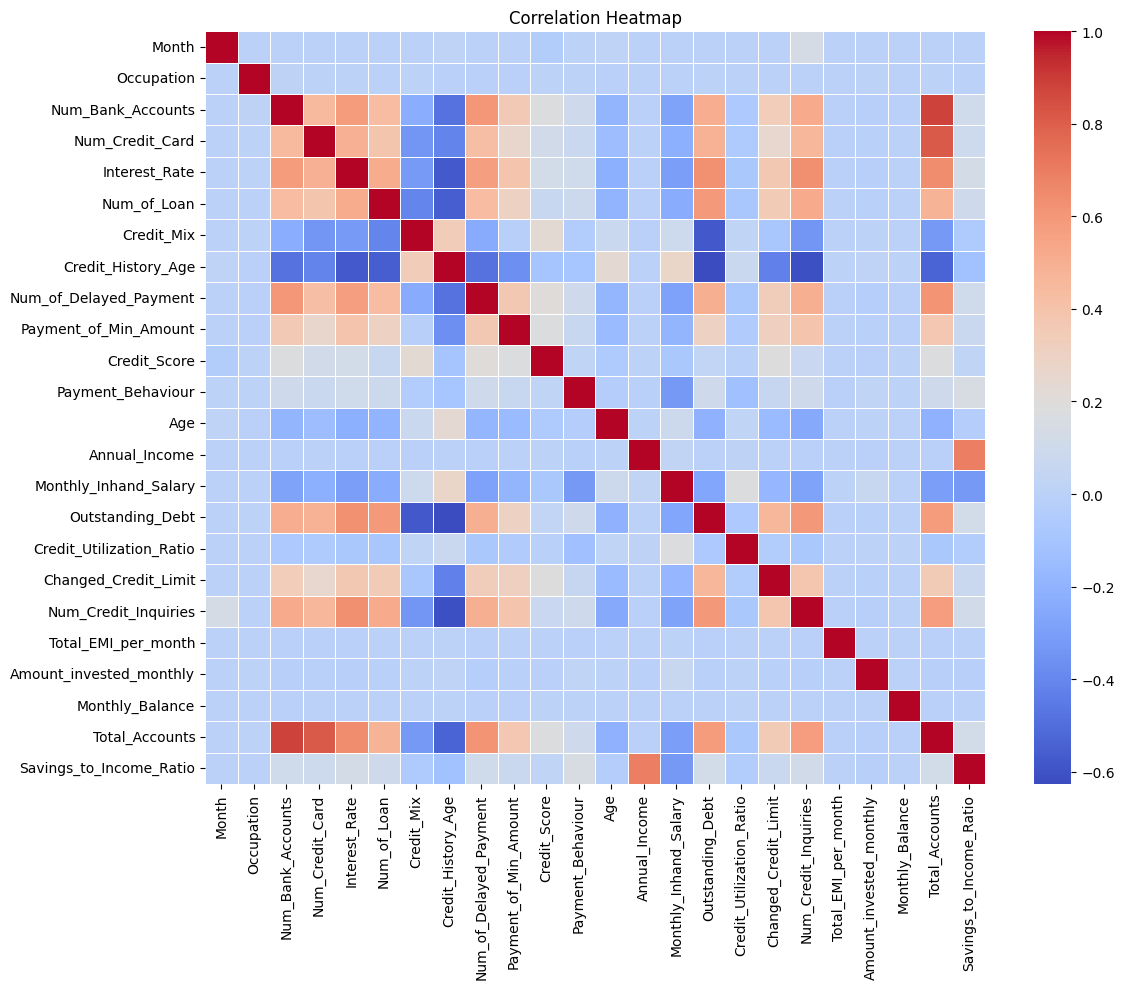

In [442]:
# Increase the figure size
plt.figure(figsize=(12, 10))

# Correlation heatmap
corr_matrix = df.corr()

# Customize the heatmap
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Add a title
plt.title('Correlation Heatmap')

# Adjust the layout to prevent overlapping of the heatmap
plt.tight_layout()

# Display the heatmap
plt.show()

In [443]:
df.describe()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,3.500000,6.949840,6.36854,5.533680,13.53208,4.357200,1.22080,407.364810,29.586050,1.403190,1.353460,2.733990,33.311600,1.764157e+05,4198.350924,1426.220376,32.285173,10.464163,5.778850,1403.118217,617.257610,3.000000e+22,10.902220,0.006267
std,2.291299,4.309542,2.59357,2.067126,8.74133,2.553913,0.80462,193.557977,12.405219,0.693378,0.764913,1.860624,10.764715,1.429618e+06,3187.402015,1155.129026,5.116875,6.667064,3.861291,8306.041270,1999.677146,3.162151e+24,3.967964,0.009667
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,7.005930e+03,303.645417,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,7.759665e-03,1.000000,0.000000
25%,1.750000,3.000000,4.00000,4.000000,6.00000,2.000000,1.00000,256.000000,21.000000,1.000000,1.000000,1.000000,24.000000,1.945750e+04,1626.761667,566.072500,28.052567,5.350000,3.000000,30.306660,75.356284,2.703231e+02,8.000000,0.001550
50%,3.500000,7.000000,6.00000,5.000000,12.00000,4.000000,1.00000,403.000000,31.000000,2.000000,2.000000,3.000000,33.000000,3.757861e+04,3095.978333,1166.155000,32.305784,9.400000,5.000000,69.249473,136.173912,3.372971e+02,11.000000,0.003430
75%,5.250000,11.000000,8.00000,7.000000,19.00000,6.000000,2.00000,563.000000,39.000000,2.000000,2.000000,5.000000,42.000000,7.279092e+04,5961.637500,1945.962500,36.496663,14.850000,8.000000,161.224249,263.231662,4.719681e+02,14.000000,0.007637
max,7.000000,14.000000,11.00000,11.000000,33.00000,10.000000,2.00000,761.000000,55.000000,2.000000,2.000000,5.000000,56.000000,2.419806e+07,15204.633333,4998.070000,50.000000,36.970000,17.000000,82331.000000,10000.000000,3.333333e+26,21.000000,0.083315


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Occupation                100000 non-null  int64  
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  int64  
 6   Credit_Mix                100000 non-null  int64  
 7   Credit_History_Age        100000 non-null  int64  
 8   Num_of_Delayed_Payment    100000 non-null  int64  
 9   Payment_of_Min_Amount     100000 non-null  int64  
 10  Credit_Score              100000 non-null  int64  
 11  Payment_Behaviour         100000 non-null  int64  
 12  Age                       100000 non-null  float64
 13  Annual_Income             100000 non-null  fl

In [445]:
df.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,0,12,4,4,2,5,1,490,17,1,0,2,23.0,19114.12,1824.843333,809.98,26.822620,11.27,4.0,49.574949,80.415295,312.494089,7.0,0.012138
1,1,12,4,4,2,5,1,497,16,1,0,3,23.0,19114.12,1824.843333,809.98,31.944960,11.27,4.0,49.574949,118.280222,284.629162,7.0,0.012138
2,2,12,4,4,2,5,1,494,17,1,0,4,23.0,19114.12,1824.843333,809.98,28.609352,11.27,4.0,49.574949,81.699521,331.209863,7.0,0.012138
3,3,12,4,4,2,5,1,496,11,1,0,5,23.0,19114.12,1824.843333,809.98,31.377862,6.27,4.0,49.574949,199.458074,223.451310,7.0,0.012138
4,4,12,4,4,2,5,1,498,16,1,0,1,23.0,19114.12,1824.843333,809.98,24.797347,11.27,4.0,49.574949,41.420153,341.489231,7.0,0.012138


In [446]:
df.shape

(100000, 24)

In [447]:
# df.to_csv('/content/drive/MyDrive/csi project/final_train.csv', index=False)

In [448]:
# df.to_excel('/content/drive/MyDrive/csi project/final_train.xlsx', index=False)

In [449]:
# decoded_data = df.copy()

# # Iterate over each column and apply inverse transformation
# for column in encoders.keys():
#     encoder = encoders[column]
#     decoded_data[column] = encoder.inverse_transform(decoded_data[column])

In [450]:
# decoded_data.to_excel('/content/drive/MyDrive/csi project/decoded_data.xlsx', index=False)

In [451]:
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,5,3,1,7,7,1,1,528,15,1,1,2,19.0,80485.76,6463.146667,1301.95,30.207917,5.13,3.0,0.000000,408.846780,497.467886,7.0,0.003032
1,5,11,1,7,4,2,1,693,4,1,0,5,54.0,57652.54,4968.378333,1401.50,35.050491,11.95,2.0,36.559940,558.897395,191.380498,7.0,0.002845
2,5,10,4,2,6,2,1,423,17,1,0,1,18.0,40846.36,3614.863333,1262.52,36.307327,6.53,1.0,28.162839,123.971219,448.513954,5.0,0.005166
3,3,9,5,7,12,6,2,313,37,2,2,1,21.0,29704.64,2365.386667,1713.04,27.929051,7.10,5.0,68.740789,90.399235,327.398643,11.0,0.003703
4,1,3,11,10,17,8,2,297,39,2,2,3,40.0,68529.92,6000.826667,2643.57,32.322121,17.99,12.0,318.194362,268.440004,283.448301,20.0,0.004232


Splitting Data

In [452]:
df_test=df.iloc[80000:]
df=df.iloc[0:80000]

In [453]:
len(df)

80000

In [454]:
len(df_test)

20000

Train Test Split

In [455]:
y=df['Credit_Score']
X=df.drop(['Credit_Score'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [456]:
num_cols=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Amount_invested_monthly',
                   'Monthly_Balance', 'Total_Accounts', 'Savings_to_Income_Ratio']

In [397]:
# from sklearn.preprocessing import StandardScaler

# # Assuming 'df' is the merged dataframe containing both numerical and categorical columns

# # Select numerical columns for scaling
# numerical_columns = num_cols

# # Create a dictionary to store the scaler objects
# scalers = {}

# # Iterate over each column and apply scaling
# for column in numerical_columns:
#     scaler = StandardScaler()
#     df[column] = scaler.fit_transform(df[[column]])
#     scalers[column] = scaler

# # Save the scaler objects
# for column, scaler in scalers.items():
#     dump(scaler, f'{column}_scaler.joblib')


In [457]:
df.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,5,3,1,7,7,1,1,528,15,1,1,2,19.0,80485.76,6463.146667,1301.95,30.207917,5.13,3.0,0.000000,408.846780,497.467886,7.0,0.003032
1,5,11,1,7,4,2,1,693,4,1,0,5,54.0,57652.54,4968.378333,1401.50,35.050491,11.95,2.0,36.559940,558.897395,191.380498,7.0,0.002845
2,5,10,4,2,6,2,1,423,17,1,0,1,18.0,40846.36,3614.863333,1262.52,36.307327,6.53,1.0,28.162839,123.971219,448.513954,5.0,0.005166
3,3,9,5,7,12,6,2,313,37,2,2,1,21.0,29704.64,2365.386667,1713.04,27.929051,7.10,5.0,68.740789,90.399235,327.398643,11.0,0.003703
4,1,3,11,10,17,8,2,297,39,2,2,3,40.0,68529.92,6000.826667,2643.57,32.322121,17.99,12.0,318.194362,268.440004,283.448301,20.0,0.004232


In [216]:
evaluation_dict = {}

In [218]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [219]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
evaluation_dict

{'Logistic Regression': [0.6020278295930624,
  0.5558441631878398,
  0.5714837578296738,
  0.624810606060606],
 'SVC': [0.41237588136812936,
  0.4625324230391719,
  0.42919459819211186,
  0.6061742424242424],
 'Random Forest': [0.8020080645932985,
  0.8033280030838187,
  0.8026032116005597,
  0.8117045454545454],
 'Gradient Boosting': [0.6883809999351701,
  0.6911552668513617,
  0.6849734302857252,
  0.7081060606060606],
 'Multilayer Perceptron': [0.6668876616821552,
  0.7038116528812987,
  0.6676598820976672,
  0.6829924242424242]}

In [222]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]


In [224]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]


In [225]:
# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred,average='macro')
mlp_recall = recall_score(y_test, mlp_pred,average='macro')
mlp_f1_score = f1_score(y_test, mlp_pred,average='macro')
evaluation_dict['Multilayer Perceptron'] = [mlp_precision, mlp_recall, mlp_f1_score, mlp_accuracy]


In [227]:
df.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,7,5,8,3,6,6,2,346,39,2,1,4,-1.051513,-0.109842,-0.759175,0.187341,0.990135,1.423231,0.835364,-0.162463,-0.255781,-0.007906,-0.227854,0.299517
1,5,6,5,5,5,3,1,512,11,1,0,0,0.528828,-0.109174,-0.707354,-0.196059,-0.264237,-0.962323,-0.460651,-0.166197,-0.290727,-0.007906,-0.480026,0.696346
2,5,5,5,4,10,6,2,186,39,2,2,4,-1.423357,-0.100855,-0.557625,-0.632261,0.552042,0.817090,0.057755,-0.158880,-0.271353,-0.007906,-0.732199,0.144278
3,5,10,6,4,1,1,1,595,35,1,0,5,1.737324,-0.086158,-0.002800,-0.652559,-1.157585,-1.013335,-0.460651,-0.112188,-0.200168,-0.007906,-0.480026,-0.225529
4,4,12,7,6,18,6,0,315,35,2,2,2,-0.586707,-0.103615,-0.673948,0.008952,-1.817079,-0.192645,0.835364,-0.161889,-0.261572,-0.007906,0.276492,0.417390


Since we were getting not desirable accuracy we went with ols report

In [230]:
import statsmodels.api as sm

# Separate the dependent variable and independent variables
Xo = df.drop('Credit_Score', axis=1)  # Drop the dependent variable column
yo = df['Credit_Score']  # Set the dependent variable column

# Add a constant column to the independent variables
Xo = sm.add_constant(Xo)

# Fit the OLS model
model = sm.OLS(yo, Xo)
results = model.fit()

# Print the OLS regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     702.3
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:39:53   Log-Likelihood:                -85073.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79977   BIC:                         1.704e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [231]:
import statsmodels.api as sm
def drop_highest_pvalue(df, target_col):
    # Separate the dependent variable and independent variables
    X = df.drop(target_col, axis=1)  # Drop the dependent variable column
    y = df[target_col]  # Set the dependent variable column

    # Add a constant column to the independent variables
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Get the p-values for all the variables
    pvalues = results.pvalues
    pvalues = pvalues.drop('const')  # Exclude the constant term

    # Identify the column with the highest p-value
    column_to_drop = pvalues.idxmax()

    # Drop the column with the highest p-value
    df_new = df.drop(column_to_drop, axis=1)

    return df_new, column_to_drop, results



In [232]:
# Call the function to drop the column with the highest p-value
df_new, column_dropped, results_new = drop_highest_pvalue(df, 'Credit_Score')

# Print the dropped column
print("Dropped Column:", column_dropped)

# Print the OLS regression results after dropping the column
print(results_new.summary())

Dropped Column: Interest_Rate
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     702.3
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:43:07   Log-Likelihood:                -85073.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79977   BIC:                         1.704e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [233]:
# Call the function to drop the column with the highest p-value
df_new, column_dropped, results_new = drop_highest_pvalue(df_new, 'Credit_Score')

# Print the dropped column
print("Dropped Column:", column_dropped)

# Print the OLS regression results after dropping the column
print(results_new.summary())

Dropped Column: Total_EMI_per_month
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     735.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:43:50   Log-Likelihood:                -85073.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79978   BIC:                         1.704e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [234]:
# Call the function to drop the column with the highest p-value
df_new, column_dropped, results_new = drop_highest_pvalue(df_new, 'Credit_Score')

# Print the dropped column
print("Dropped Column:", column_dropped)

# Print the OLS regression results after dropping the column
print(results_new.summary())

Dropped Column: Payment_Behaviour
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     772.6
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:44:38   Log-Likelihood:                -85073.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79979   BIC:                         1.704e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [235]:
# Call the function to drop the column with the highest p-value
df_new, column_dropped, results_new = drop_highest_pvalue(df_new, 'Credit_Score')

# Print the dropped column
print("Dropped Column:", column_dropped)

# Print the OLS regression results after dropping the column
print(results_new.summary())

Dropped Column: Amount_invested_monthly
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     813.2
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:45:19   Log-Likelihood:                -85073.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79980   BIC:                         1.704e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [236]:
# Call the function to drop the column with the highest p-value
df_new, column_dropped, results_new = drop_highest_pvalue(df_new, 'Credit_Score')

# Print the dropped column
print("Dropped Column:", column_dropped)

# Print the OLS regression results after dropping the column
print(results_new.summary())

Dropped Column: Occupation
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     858.4
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:45:42   Log-Likelihood:                -85073.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79981   BIC:                         1.704e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [237]:
# Call the function to drop the column with the highest p-value
df_new, column_dropped, results_new = drop_highest_pvalue(df_new, 'Credit_Score')

# Print the dropped column
print("Dropped Column:", column_dropped)

# Print the OLS regression results after dropping the column
print(results_new.summary())

Dropped Column: Monthly_Inhand_Salary
                            OLS Regression Results                            
Dep. Variable:           Credit_Score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     908.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:45:56   Log-Likelihood:                -85074.
No. Observations:               80000   AIC:                         1.702e+05
Df Residuals:                   79982   BIC:                         1.704e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [241]:
df.shape

(80000, 24)

In [240]:
df_new.shape

(80000, 18)

In [242]:
df_new

,Month,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,7,8,3,6,2,346,39,2,1,-1.051513,-0.109842,0.187341,0.990135,1.423231,0.835364,-0.007906,-0.227854,0.299517
1,5,5,5,3,1,512,11,1,0,0.528828,-0.109174,-0.196059,-0.264237,-0.962323,-0.460651,-0.007906,-0.480026,0.696346
2,5,5,4,6,2,186,39,2,2,-1.423357,-0.100855,-0.632261,0.552042,0.817090,0.057755,-0.007906,-0.732199,0.144278
3,5,6,4,1,1,595,35,1,0,1.737324,-0.086158,-0.652559,-1.157585,-1.013335,-0.460651,-0.007906,-0.480026,-0.225529
4,4,7,6,6,0,315,35,2,2,-0.586707,-0.103615,0.008952,-1.817079,-0.192645,0.835364,-0.007906,0.276492,0.417390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,4,6,7,2,168,19,2,2,0.714750,-0.090179,-0.338721,0.319147,0.330977,0.316958,-0.007906,-0.480026,-0.591529
79996,6,8,6,1,2,591,39,2,2,-0.121901,-0.056425,-0.092732,0.358732,1.348213,0.057755,-0.007906,0.528664,-0.399380
79997,1,2,4,3,1,748,25,1,0,-1.423357,-0.035495,-0.580264,-1.653292,0.213950,-0.460651,-0.007906,-1.488717,-0.433870
79998,0,9,9,8,0,134,47,0,2,0.156983,-0.102777,2.234050,0.253925,1.936350,1.612974,-0.007906,1.537355,-0.567222


In [243]:
removed_cols=['Interest_Rate','Total_EMI_per_month','Payment_Behaviour','Amount_invested_monthly','Occupation','Monthly_Inhand_Salary']

In [250]:
yo=df_new['Credit_Score']
Xo=df_new.drop(['Credit_Score'],axis=1)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(Xo, yo, test_size=0.33, random_state=42)
evaluation_dict_o = {}


In [260]:
# Logistic Regression
lr_model_o = LogisticRegression(max_iter=2000)
lr_model_o.fit(X_train_o, y_train_o)
lr_pred_o = lr_model_o.predict(X_test_o)
lr_accuracy_o = accuracy_score(y_test_o, lr_pred_o)
lr_precision_o = precision_score(y_test_o, lr_pred_o, average='macro')
lr_recall_o = recall_score(y_test_o, lr_pred_o, average='macro')
lr_f1_score_o = f1_score(y_test_o, lr_pred_o, average='macro')
evaluation_dict_o['Logistic Regression'] = [lr_precision_o, lr_recall_o, lr_f1_score_o, lr_accuracy_o]


In [261]:
evaluation_dict_o

{'Logistic Regression': [0.6129539165828142,
  0.5812392909434019,
  0.591930687389893,
  0.6323863636363637],
 'SVC': [0.387233040166338,
  0.4199238443783204,
  0.38788545717811296,
  0.5729545454545455],
 'Random Forest': [0.8006380850977418,
  0.8018985945902773,
  0.8012465156683716,
  0.8103030303030303],
 'Gradient Boosting': [0.6799297793935327,
  0.6840722581257316,
  0.676926045768291,
  0.7000378787878788],
 'Multilayer Perceptron': [0.6378977607577373,
  0.6603039729798165,
  0.644942374820789,
  0.6643939393939394]}

In [253]:
# Support Vector Classifier (SVC)
svc_model_o = SVC()
svc_model_o.fit(X_train_o, y_train_o)
svc_pred_o = svc_model_o.predict(X_test_o)
svc_accuracy_o = accuracy_score(y_test_o, svc_pred_o)
svc_precision_o = precision_score(y_test_o, svc_pred_o, average='macro')
svc_recall_o = recall_score(y_test_o, svc_pred_o, average='macro')
svc_f1_score_o = f1_score(y_test_o, svc_pred_o, average='macro')
evaluation_dict_o['SVC'] = [svc_precision_o, svc_recall_o, svc_f1_score_o, svc_accuracy_o]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:

# Random Forest
rf_model_o = RandomForestClassifier()
rf_model_o.fit(X_train_o, y_train_o)
rf_pred_o = rf_model_o.predict(X_test_o)
rf_accuracy_o = accuracy_score(y_test_o, rf_pred_o)
rf_precision_o = precision_score(y_test_o, rf_pred_o, average='macro')
rf_recall_o = recall_score(y_test_o, rf_pred_o, average='macro')
rf_f1_score_o = f1_score(y_test_o, rf_pred_o, average='macro')
evaluation_dict_o['Random Forest'] = [rf_precision_o, rf_recall_o, rf_f1_score_o, rf_accuracy_o]


In [255]:

# Gradient Boosting
gb_model_o = GradientBoostingClassifier()
gb_model_o.fit(X_train_o, y_train_o)
gb_pred_o = gb_model_o.predict(X_test_o)
gb_accuracy_o = accuracy_score(y_test_o, gb_pred_o)
gb_precision_o = precision_score(y_test_o, gb_pred_o, average='macro')
gb_recall_o = recall_score(y_test_o, gb_pred_o, average='macro')
gb_f1_score_o = f1_score(y_test_o, gb_pred_o, average='macro')
evaluation_dict_o['Gradient Boosting'] = [gb_precision_o, gb_recall_o, gb_f1_score_o, gb_accuracy_o]


In [256]:

# Multilayer Perceptron (Neural Network)
mlp_model_o = MLPClassifier()
mlp_model_o.fit(X_train_o, y_train_o)
mlp_pred_o = mlp_model_o.predict(X_test_o)
mlp_accuracy_o = accuracy_score(y_test_o, mlp_pred_o)
mlp_precision_o = precision_score(y_test_o, mlp_pred_o, average='macro')
mlp_recall_o = recall_score(y_test_o, mlp_pred_o, average='macro')
mlp_f1_score_o = f1_score(y_test_o, mlp_pred_o, average='macro')
evaluation_dict_o['Multilayer Perceptron'] = [mlp_precision_o, mlp_recall_o, mlp_f1_score_o, mlp_accuracy_o]


So not much change after removing ols suggested columns which is good as these columns are not needed.

In [262]:
df['Credit_Score'].value_counts()

2    42526
1    23166
0    14308
Name: Credit_Score, dtype: int64

In [271]:
encoders['Credit_Score'].inverse_transform([0])

array(['Good'], dtype=object)

In [272]:
encoders['Credit_Score'].inverse_transform([1])

array(['Poor'], dtype=object)

In [273]:
encoders['Credit_Score'].inverse_transform([2])

array(['Standard'], dtype=object)

In [283]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Credit_Score', axis=1), df['Credit_Score'], test_size=0.2, random_state=42)


In [284]:
# Define the class weights
class_weights = {0: 2, 1: 2, 2: 1}

In [285]:
# Create and train the logistic regression model with class weighting
lr_model = LogisticRegression(class_weight=class_weights,max_iter=2000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

In [292]:
evaluation_dict

{'Logistic Regression': [0.6283116297407254,
  0.6769825401152243,
  0.6391663409004139,
  0.648625],
 'SVC': [0.6047909462060733, 0.6546026757884852, 0.6107400812241863, 0.6195],
 'Random Forest': [0.8096129686489685,
  0.8095957274548197,
  0.8095173454189228,
  0.8169375],
 'Gradient Boosting': [0.6858777995065498,
  0.6875922381375671,
  0.6815518835730278,
  0.706],
 'Multilayer Perceptron': [0.6573538683893724,
  0.709914910888391,
  0.6594406099378911,
  0.6685625]}

In [288]:
# Support Vector Classifier (SVC)
svc_model = SVC(class_weight=class_weights)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]

# Random Forest
rf_model = RandomForestClassifier(class_weight=class_weights)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]




In [289]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]



In [291]:
# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred,average='macro')
mlp_recall = recall_score(y_test, mlp_pred,average='macro')
mlp_f1_score = f1_score(y_test, mlp_pred,average='macro')
evaluation_dict['Multilayer Perceptron'] = [mlp_precision, mlp_recall, mlp_f1_score, mlp_accuracy]

In [293]:
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Credit_Score', axis=1), df['Credit_Score'], test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [294]:
# Create and train the logistic regression model with class weighting
lr_model = LogisticRegression(class_weight=class_weights,max_iter=2000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [295]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]

# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred,average='macro')
mlp_recall = recall_score(y_test, mlp_pred,average='macro')
mlp_f1_score = f1_score(y_test, mlp_pred,average='macro')
evaluation_dict['Multilayer Perceptron'] = [mlp_precision, mlp_recall, mlp_f1_score, mlp_accuracy]


In [296]:
evaluation_dict

{'Logistic Regression': [0.6165280145292171,
  0.6745294789976359,
  0.6049223672025167,
  0.605625],
 'SVC': [0.6141783033268592, 0.671579054980694, 0.6126408425463914, 0.617],
 'Random Forest': [0.7922438995973381,
  0.8239416012714917,
  0.8055761347023561,
  0.8125],
 'Gradient Boosting': [0.6671076586073686,
  0.7164802727122429,
  0.6765859936050641,
  0.688375],
 'Multilayer Perceptron': [0.6525840480178721,
  0.6543724826096416,
  0.6528536341772063,
  0.6818125]}

So all these approach of balancing dataset was basically useless as it gives almost same metrics

In [460]:
df.shape

(80000, 24)

In [302]:
# some analysis
# Check if at least 12 columns have the same values for each row
duplicate_rows = df[df.apply(lambda row: sum(row.duplicated()) >= 7, axis=1)]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

print("Number of rows with at least 12 columns having the same values:", num_duplicate_rows)

Number of rows with at least 12 columns having the same values: 238


In [458]:
bin_df=df[df['Credit_Score'] != 2].copy()

In [461]:
bin_df.shape

(37548, 24)

In [462]:
bin_df.head()

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,5,3,1,7,7,1,1,528,15,1,1,2,19.0,80485.76,6463.146667,1301.95,30.207917,5.13,3.0,0.000000,408.846780,497.467886,7.0,0.003032
1,5,11,1,7,4,2,1,693,4,1,0,5,54.0,57652.54,4968.378333,1401.50,35.050491,11.95,2.0,36.559940,558.897395,191.380498,7.0,0.002845
2,5,10,4,2,6,2,1,423,17,1,0,1,18.0,40846.36,3614.863333,1262.52,36.307327,6.53,1.0,28.162839,123.971219,448.513954,5.0,0.005166
5,0,1,7,3,33,7,2,393,25,2,1,5,26.0,57294.20,4699.516667,1347.23,31.596043,15.84,8.0,253.782480,478.664311,27.504876,9.0,0.001309
7,4,4,7,5,14,4,2,342,41,2,1,5,26.0,39123.42,3020.285000,139.77,37.584317,7.47,5.0,64.498423,10000.000000,204.867863,11.0,0.006134


In [463]:
X_train, X_test, y_train, y_test = train_test_split(bin_df.drop('Credit_Score', axis=1), bin_df['Credit_Score'], test_size=0.3, random_state=42)

In [464]:
# Create and train the logistic regression model with class weighting
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

In [465]:
evaluation_dict

{'Logistic Regression': [0.7989538988258174,
  0.8093934040047115,
  0.8027615363010803,
  0.811185086551265],
 'SVC': [0.8389709160122,
  0.8582683509112495,
  0.840853279591038,
  0.8441697055945921],
 'Random Forest': [0.9546432463058312,
  0.9591211672342652,
  0.9567656758326113,
  0.9589967090634173],
 'Gradient Boosting': [0.8578321632772515,
  0.8765570395969574,
  0.8616885306630946,
  0.8652494885706662],
 'Multilayer Perceptron': [0.8090287747649594,
  0.7563211652758725,
  0.7685686154614196,
  0.7972071511162501],
 'Decision Tree': [0.9299018787811605,
  0.9291656053116977,
  0.9295306109374915,
  0.933558658720982],
 'KNN': [0.869764500214458,
  0.8775575804352809,
  0.8731269689793473,
  0.878946900293516],
 'Gaussian Naive Bayes': [0.815116104573747,
  0.8218027595363331,
  0.8179549958180166,
  0.8262919149693142],
 'XGBoost': [0.9380291988365467,
  0.9444401800218991,
  0.9409715668957825,
  0.9438761896291026],
 'LightGBM': [0.8939346793051047,
  0.9104882896833077,


In [466]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]



In [467]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]

# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred,average='macro')
mlp_recall = recall_score(y_test, mlp_pred,average='macro')
mlp_f1_score = f1_score(y_test, mlp_pred,average='macro')
evaluation_dict['Multilayer Perceptron'] = [mlp_precision, mlp_recall, mlp_f1_score, mlp_accuracy]


In [468]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='macro')
dt_recall = recall_score(y_test, dt_pred,average='macro')
dt_f1_score = f1_score(y_test, dt_pred,average='macro')
evaluation_dict['Decision Tree'] = [dt_precision, dt_recall, dt_f1_score, dt_accuracy]


In [469]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_f1_score = f1_score(y_test, knn_pred,average='macro')
evaluation_dict['KNN'] = [knn_precision, knn_recall, knn_f1_score, knn_accuracy]


In [470]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred,average='macro')
nb_recall = recall_score(y_test, nb_pred,average='macro')
nb_f1_score = f1_score(y_test, nb_pred,average='macro')
evaluation_dict['Gaussian Naive Bayes'] = [nb_precision, nb_recall, nb_f1_score, nb_accuracy]


In [471]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='macro')
xgb_recall = recall_score(y_test, xgb_pred,average='macro')
xgb_f1_score = f1_score(y_test, xgb_pred,average='macro')
evaluation_dict['XGBoost'] = [xgb_precision, xgb_recall, xgb_f1_score, xgb_accuracy]

In [472]:
# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred,average='macro')
lgbm_recall = recall_score(y_test, lgbm_pred,average='macro')
lgbm_f1_score = f1_score(y_test, lgbm_pred,average='macro')
evaluation_dict['LightGBM'] = [lgbm_precision, lgbm_recall, lgbm_f1_score, lgbm_accuracy]

In [473]:
# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred,average='macro')
adaboost_recall = recall_score(y_test, adaboost_pred,average='macro')
adaboost_f1_score = f1_score(y_test, adaboost_pred,average='macro')
evaluation_dict['AdaBoost'] = [adaboost_precision, adaboost_recall, adaboost_f1_score, adaboost_accuracy]

In [474]:
# Print the evaluation dictionary
print(evaluation_dict)

{'Logistic Regression': [0.7989538988258174, 0.8093934040047115, 0.8027615363010803, 0.811185086551265], 'SVC': [0.694746432079858, 0.6113892160711949, 0.6032585613347095, 0.6884154460719041], 'Random Forest': [0.9453697613184183, 0.9538750968962983, 0.9491899579857617, 0.951797603195739], 'Gradient Boosting': [0.852830304811321, 0.8735702133228636, 0.8563242446818395, 0.8600088770528185], 'Multilayer Perceptron': [0.8046154140143047, 0.8193498132544068, 0.8086367955388476, 0.815179760319574], 'Decision Tree': [0.9296295984552995, 0.9282116718512479, 0.9289099012324152, 0.9333333333333333], 'KNN': [0.856829452017043, 0.8584609344326659, 0.8576253864838217, 0.8659565024411895], 'Gaussian Naive Bayes': [0.8030456159458124, 0.8180649935066897, 0.8069680633838502, 0.813404349755881], 'XGBoost': [0.9331188309023651, 0.9405348675666697, 0.9364899824459307, 0.9398135818908122], 'LightGBM': [0.8895728155165332, 0.9073769542850816, 0.895296405197056, 0.8990679094540612], 'AdaBoost': [0.82960948

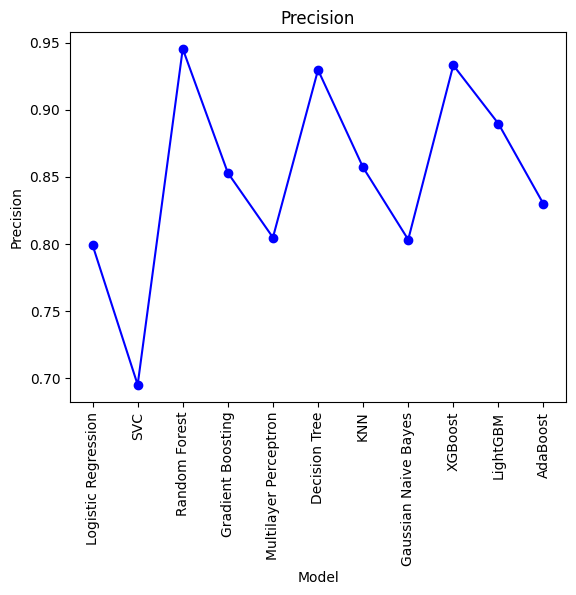

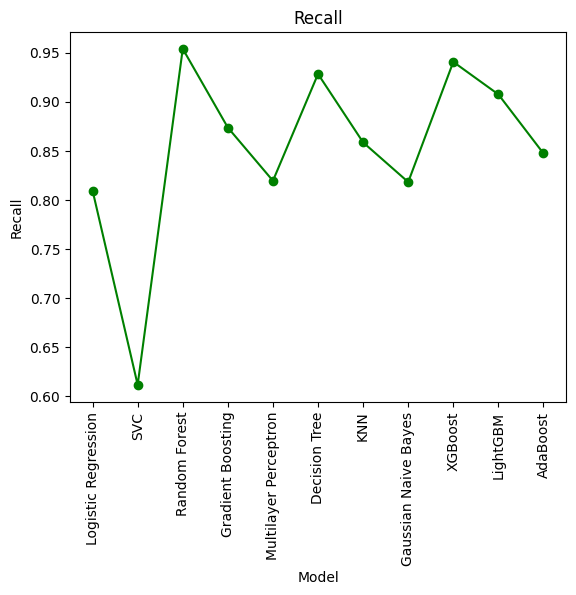

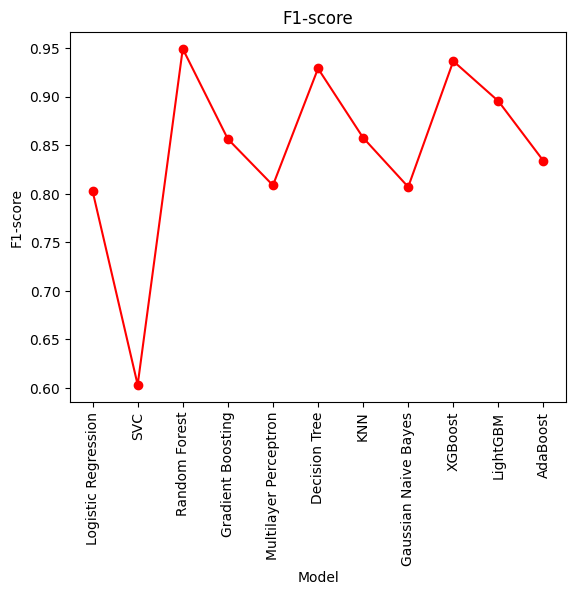

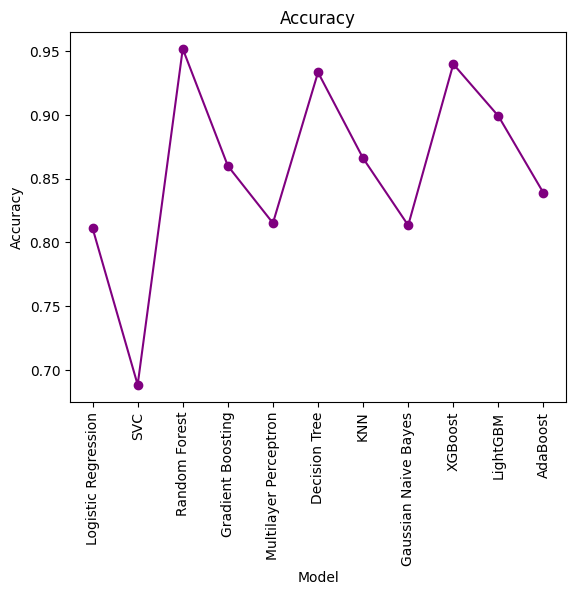

In [475]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
colors = ['blue', 'green', 'red', 'purple']

# Create separate line graphs for each metric
for metric, color in zip(metrics, colors):
    plt.figure()
    plt.title(metric)
    plt.xlabel('Model')
    plt.ylabel(metric)

    # Get the data points for the current metric
    metric_values = [evaluation_dict[model][metrics.index(metric)] for model in evaluation_dict.keys()]

    # Plot the line graph
    plt.plot(evaluation_dict.keys(), metric_values, color=color, marker='o', linestyle='-')
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

In [476]:
df_test.shape

(20000, 24)

In [477]:
bin_df_test=df_test[df_test['Credit_Score'] != 2].copy()

In [478]:
bin_df_test.shape

(9278, 24)

In [479]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    'Adaboost': adaboost_model,
    'LightGBM': lgbm_model,
    'XGBoost': xgb_model,
    'Naive Bayes': nb_model,
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'MLP': mlp_model,
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'SVC': svc_model,
    'Logistic Regression': lr_model
}

bin_df_test_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name, model in models.items():
    predictions = model.predict(bin_df_test.drop('Credit_Score', axis=1))
    accuracy = accuracy_score(bin_df_test['Credit_Score'], predictions)
    precision = precision_score(bin_df_test['Credit_Score'], predictions, average='macro')
    recall = recall_score(bin_df_test['Credit_Score'], predictions, average='macro')
    f1 = f1_score(bin_df_test['Credit_Score'], predictions, average='macro')

    bin_df_test_metrics = bin_df_test_metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Print the metrics for each model
print(bin_df_test_metrics)



<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bin_df_test_metrics = bin_df_test_metrics.append({
<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bin_df_test_metrics = bin_df_test_metrics.append({
<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bin_df_test_metrics = bin_df_test_metrics.append({
<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bin_df_test_metrics = bin_df_test_metrics.append({
<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be remove

                  Model  Accuracy  Precision    Recall  F1 Score
0              Adaboost  0.835848   0.827634  0.843390  0.831253
1              LightGBM  0.893296   0.884731  0.900828  0.889785
2               XGBoost  0.937271   0.931622  0.936841  0.934051
3           Naive Bayes  0.814831   0.805551  0.819156  0.809111
4                   KNN  0.866566   0.858642  0.859324  0.858979
5         Decision Tree  0.934038   0.930859  0.929367  0.930100
6                   MLP  0.812783   0.803684  0.817496  0.807140
7     Gradient Boosting  0.856435   0.850291  0.868981  0.853148
8         Random Forest  0.947618   0.941976  0.948640  0.945017
9                   SVC  0.687972   0.696967  0.616873  0.609505
10  Logistic Regression  0.810304   0.799436  0.809407  0.802953


<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bin_df_test_metrics = bin_df_test_metrics.append({
<ipython-input-479-e01f3bc5bb0f>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bin_df_test_metrics = bin_df_test_metrics.append({


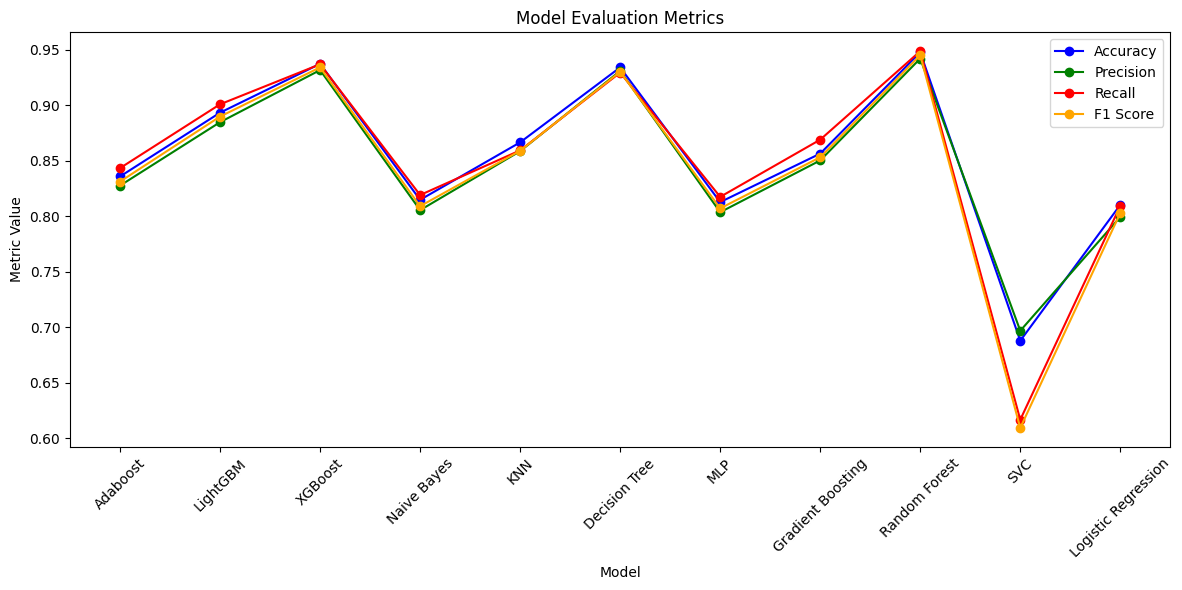

In [480]:

plt.figure(figsize=(12, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['blue', 'green', 'red', 'orange']

for i, metric in enumerate(metrics):
    plt.plot(bin_df_test_metrics['Model'], bin_df_test_metrics[metric], marker='o', color=colors[i], label=metric)

plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Therefore selected model is Adaboost

In [481]:
bin_df_test_metrics.iloc[8]

Model        Random Forest
Accuracy          0.947618
Precision         0.941976
Recall             0.94864
F1 Score          0.945017
Name: 8, dtype: object

In [482]:
import joblib
joblib.dump(adaboost_model, '/content/drive/MyDrive/csi project/v2/Random_Forest.joblib')

['/content/drive/MyDrive/csi project/v2/Random_Forest.joblib']

Checking for encoding, it feels its working correctly

In [483]:
decoded_data = bin_df.copy()

# Iterate over each column and apply inverse transformation
for column in encoders.keys():
    encoder = encoders[column]
    decoded_data[column] = encoder.inverse_transform(decoded_data[column])

In [484]:
decoded_data

,Month,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Mix,Credit_History_Age,Num_of_Delayed_Payment,Payment_of_Min_Amount,Credit_Score,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Changed_Credit_Limit,Num_Credit_Inquiries,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Accounts,Savings_to_Income_Ratio
0,6,Doctor,0.0,7.0,8.0,0.0,Good,284.0,6.0,No,Poor,High_spent_Small_value_payments,19.0,80485.76,6463.146667,1301.95,30.207917,5.13,3.0,0.000000,408.846780,497.467886,7.0,0.003032
1,6,Musician,0.0,7.0,5.0,1.0,Good,367.0,0.0,No,Good,Low_spent_Small_value_payments,54.0,57652.54,4968.378333,1401.50,35.050491,11.95,2.0,36.559940,558.897395,191.380498,7.0,0.002845
2,6,Media_Manager,3.0,2.0,7.0,1.0,Good,229.5,7.0,No,Good,High_spent_Medium_value_payments,18.0,40846.36,3614.863333,1262.52,36.307327,6.53,1.0,28.162839,123.971219,448.513954,5.0,0.005166
5,1,Architect,6.0,3.0,34.0,6.0,Standard,214.0,11.0,Yes,Poor,Low_spent_Small_value_payments,26.0,57294.20,4699.516667,1347.23,31.596043,15.84,8.0,253.782480,478.664311,27.504876,9.0,0.001309
7,5,Engineer,6.0,5.0,15.0,3.0,Standard,188.0,19.0,Yes,Poor,Low_spent_Small_value_payments,26.0,39123.42,3020.285000,139.77,37.584317,7.47,5.0,64.498423,10000.000000,204.867863,11.0,0.006134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79988,7,Teacher,5.0,5.0,7.0,4.0,Good,232.0,11.0,No,Good,High_spent_Large_value_payments,28.0,132324.18,11027.015000,1487.26,42.747129,11.79,8.0,378.729662,10000.000000,712.357669,10.0,0.000000
79991,1,Developer,8.0,9.0,26.0,6.0,Bad,117.0,20.0,NM,Poor,High_spent_Large_value_payments,17.0,19540.67,1891.389167,1584.95,31.945734,7.90,6.0,69.285581,25.754506,334.098829,17.0,0.013459
79993,6,Engineer,4.0,4.0,23.0,4.0,Standard,134.0,8.0,NM,Poor,High_spent_Small_value_payments,39.0,8707.38,426.590973,1684.57,30.586928,16.68,8.0,48.507469,20.856949,266.321109,8.0,0.034341
79996,5,Media_Manager,6.0,6.0,8.0,4.0,Standard,345.0,12.0,Yes,Good,Low_spent_Medium_value_payments,20.0,9771.77,574.034604,316.13,37.959366,11.76,7.0,105.310774,64.492184,253.708022,12.0,0.024589


In [ ]:
# ['Month', 'Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
#                      'Num_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Num_of_Delayed_Payment', 'Payment_of_Min_Amount',
#                      'Credit_Score', 'Payment_Behaviour']

In [ ]:
# 0   Occupation             100000 non-null  object
#  1   Credit_Mix             100000 non-null  object
#  2   Payment_of_Min_Amount  100000 non-null  object
#  3   Payment_Behaviour      100000 non-null  object
#  4   Credit_Score           100000 non-null  object

In [ ]:
# check=pd.read_csv('')